In [1]:
import pandas as pd
import os
files = os.listdir("./minute_data/")

In [37]:
nifty = pd.read_csv(r"./minute_data/NIFTY50 1 min 5 year data.csv",usecols=['date','open','high','low','close','volume'])
niftybank = pd.read_csv(r"./minute_data/NIFTYBANK 1 min 5 year data.csv",usecols=['date','open','high','low','close','volume'])

In [38]:
nifty.date = pd.to_datetime(nifty.date,format = '%Y-%m-%d %H:%M:%S')
niftybank.date = pd.to_datetime(niftybank.date,format = '%Y-%m-%d %H:%M:%S')

In [41]:
nifty.set_index('date',inplace=True)
niftybank.set_index('date',inplace=True)

In [43]:
df = pd.concat([nifty['close'],niftybank['close']],axis=1,keys=['nifty','niftybank'])

# Line plot

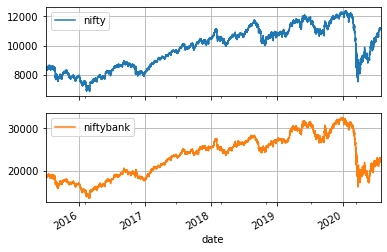

In [60]:
_ = df.plot(subplots=True,grid=True)
# both indices seem to be correlated

# Correlation plot

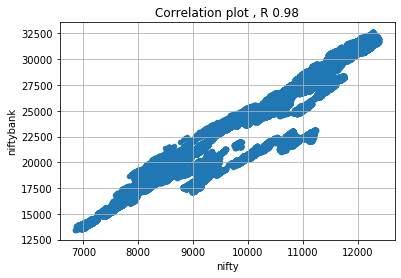

In [57]:
corr = df.corr('spearman').values[0][1]

_  = df.plot.scatter(x='nifty',y='niftybank',grid=True).set(title='Correlation plot , R {:.2f}'.format(corr))

In [72]:
from pandas.plotting import autocorrelation_plot

In [74]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df['nifty'].dropna())

In [ ]:
adfuller(df['niftybank'].dropna())